- 신경망과 퍼셉트론
- 데이터 정규화
- 보스턴의 주택 가격을 예측하기 위한 딥러닝 네트워크

# 텐서플로우 불러오기 및 버전확

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# 텐서플로우에 있는 `boston_housing` 데이터 불러오기 


In [2]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


# 데이터 표준화 작업
- 현재 각 데이터의 단위가 다름(비율/ 0 or 1/양의 정수 등)
- 데이터 표준화 과정이란?
  - 각 데이터에서 평균값을 뺀 다음 표준편차로 나눠주는 과정

In [4]:
x_mean = train_X.mean()
x_std = train_X.std()

train_X -= x_mean
train_X /= x_std

test_X -= x_mean
test_X /= x_std

#----------------
y_mean = train_Y.mean()
y_std = train_Y.std()

train_Y -= y_mean
train_Y /= y_std

test_Y -= y_mean
test_Y /= y_std

# 신경망 모델 구축
- 비선형 활성화 함수 : relu
  - 1st hidden units : 52
  - 2nd hidden units : 39
  - 3rd hidden units : 26
  - 4th hidden unists : 1


In [5]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), # 변수가 13개
                             tf.keras.layers.Dense(units=39, activation='relu'), 
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


# 컴파일 단계
- tf.keras.optimizers.Adam(): 'SGD'와 함께 자주 쓰임

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# 모델 학습
- epochs : 25
- batch_size : 32
- vaildation_split : 0.25 (학습 데이터의 검증 데이터 비율 설정)

※ 미니배치 스텝수가 10인 이유 : '학습데이터의 25%'를 검증테이터로 활용했기 때문.  


In [8]:
%%time
#
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 29ms/step - loss: 0.9831 - val_loss: 1.2372
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7797 - val_loss: 1.1229
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7134 - val_loss: 1.0718
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6802 - val_loss: 1.0880
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6751 - val_loss: 1.0344
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6526 - val_loss: 1.0739
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6449 - val_loss: 1.0295
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6334 - val_loss: 1.0572
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6238 - val_loss: 1.0131
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6191 - val_loss: 1.0761
Epoch 11/25
10/10 

# 학습결과 시각화
- 학습 데이터로 구한 손실과 검증 데이터의 손실 비교

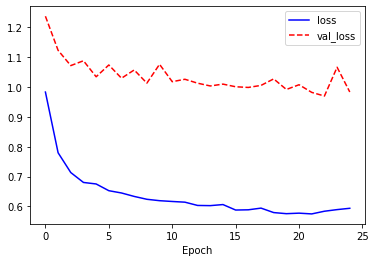

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show();

In [10]:
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6586


0.658627450466156

In [11]:
pred_Y = model.predict(test_X)

### 실제값과 예측값 결과 시각화

빨간 선 위에 많은 점이 위치해 있어야 하는데 그렇지 못한 상태이므로 성능이 좋다고 볼 수 없다.

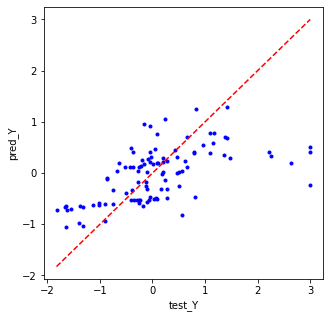

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.plot([min(test_Y),max(test_Y)], [min(test_Y), max(test_Y)],"r--")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show();

## 콜백(callback) 함수 - EarlyStopping() 
#### **왜 사용해야 하지?** 
###### 신경망이 훈련 데이터에 '과적합' 되지 않도록 학습 도중 끼어들어 학습을 조기 중단.

※ '과적합' : 생성된 모델이 학습 데이터와 지나치게 일치하여 새 데이터를 올바르게 예측하지 못하는 경우

- 콜백함수는 모델을 학습할 때 에폭이 끝날 때 마다 호출.
- patience : 몇 번의 에폭을 기준으로 할 것인지 설정.
- moniter : 어떠한 값을 모니터링 할 것인지 설정. 

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dense(units=22, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.08), loss='mse')

history = model.fit(train_X, train_Y, epochs=100, batch_size = 32, validation_split = 0.25, 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 4 , monitor='val_loss')])

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 12.2047 - val_loss: 1.2228
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8634 - val_loss: 1.0648
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7083 - val_loss: 1.0969
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7960 - val_loss: 1.0296
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6552 - val_loss: 1.0279
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6731 - val_loss: 1.0625
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7468 - val_loss: 1.0263
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6948 - val_loss: 1.0438
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6789 - val_loss: 1.0379
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6625 - val_loss: 1.0078
Epoch 1

### 학습 과정의 변화추이 시각화
- 검증 데이터의 손실에서 뚜렷한 증가세가 보이지 않는다.
- 과적합의 가능성 

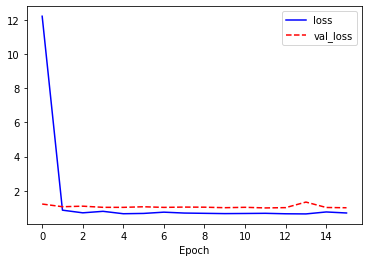

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6990


0.6990309357643127

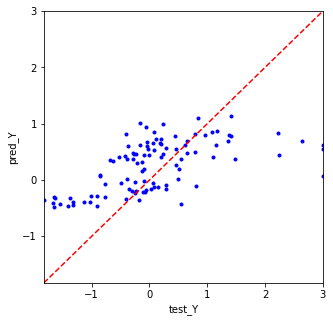

In [23]:
import matplotlib.pyplot as plt

#신경망을 활용한 test_X에 대한 '예측'
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y,'b.')
plt.axis([min(test_Y),max(test_Y), min(test_Y),max(test_Y)])

plt.plot([min(test_Y),max(test_Y)], [min(test_Y), max(test_Y)],"r--")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

성능이 좋지는 않지만 콜백함수를 사용한 경우가 사용하지 않는 경우보다 성능이 좋음.